In [1]:
# Machine Learning Model 
# LSTM
# Train Data
# x_train lat,lon,distance,speed,time diff
# y_train pred_lat,pred_lon

# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt




In [2]:
# for kaggle!!--------------------------------
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# end for kaggle!!------------------------------


df = pd.read_csv('Dataset.csv')

In [3]:
train_x = df[['Longitude','Latitude','Time_diff','Haversine_Distance','Calculated_Speed']]
train_y=df[['Pred_Lat','Pred_Lon']]

In [4]:

print(train_x.tail(3))


print(train_y.tail(3))

        Longitude   Latitude  Time_diff  Haversine_Distance  Calculated_Speed
19825 -105.434017  41.233209        8.0            3.209280          0.401160
19826 -105.434054  41.233212        5.0            3.111959          0.622392
19827 -105.434079  41.233234       27.0            3.217884          0.119181
        Pred_Lat    Pred_Lon
19825  41.233212 -105.434054
19826  41.233234 -105.434079
19827  41.233234 -105.434079


In [11]:
import numpy as np
# convert pandas dataframe to numpy array

x_data = train_x.values
x_data = np.array(x_data)
# x_data = x_data.reshape(19828,5,1)
x_data.shape

(19828, 5)

In [12]:
y_data = train_y.values
y_data.shape

(19828, 2)

In [16]:
# Preporcessing Normalizing Valuse

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(-1,1))
# new_df= x_data[].reshape(x_data.shape[0],5)
new_x_data = sc.fit_transform(x_data)
new_x_data = new_x_data.reshape(19828,5,1)

print('X_data shape :', x_data.shape)
print('new X_data shape :', new_x_data.shape)



new_y_data = sc.fit_transform(y_data)

print('y_data shape :', y_data.shape)
print('new y_data shape :', new_y_data.shape)


X_data shape : (19828, 5)
new X_data shape : (19828, 5, 1)
y_data shape : (19828, 2)
new y_data shape : (19828, 2)


In [20]:
# new_x_data.reshape(new_x_data.shape[0],5,1)


In [ ]:
# for inversing transform


new_df.reshape(19828,5)
new_df = sc.inverse_transform(new_df)
new_df.reshape(new_df.shape[0],5,1)


In [21]:
import tensorflow as tf



from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.recurrent import LSTM,RNN
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split




In [24]:
x_train, x_test, y_train, y_test = train_test_split(new_x_data, new_y_data, test_size=0.33, random_state=42)



In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(13284, 5, 1)
(13284, 2)
(6544, 5, 1)
(6544, 2)


In [28]:
model = Sequential()

# first layer
model.add(LSTM(units=50, batch_input_shape=(None,5,1),return_sequences=True))
model.add(Dropout(0.2))

# second layer
# model.add(Dense(128, 1))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

# third layer
model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))

# fourth dense layer
model.add(Dense(units=2))


model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()
          




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 5, 50)             10400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 50)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 5, 100)            60400     
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 100)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                

In [29]:
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Train on 13284 samples, validate on 6544 samples
Epoch 1/50
13284/13284 [==============================] - 18s 1ms/sample - loss: 0.1606 - accuracy: 0.8656 - val_loss: 0.0634 - val_accuracy: 0.9418
Epoch 2/50
13284/13284 [==============================] - 8s 637us/sample - loss: 0.0834 - accuracy: 0.9452 - val_loss: 0.0418 - val_accuracy: 0.9690
Epoch 3/50
13284/13284 [==============================] - 9s 658us/sample - loss: 0.0741 - accuracy: 0.9556 - val_loss: 0.0551 - val_accuracy: 0.9623
Epoch 4/50
13284/13284 [==============================] - 8s 626us/sample - loss: 0.0681 - accuracy: 0.9611 - val_loss: 0.0369 - val_accuracy: 0.9804
Epoch 5/50
13284/13284 [==============================] - 9s 664us/sample - loss: 0.0646 - accuracy: 0.9663 - val_loss: 0.0274 - val_accuracy: 0.9840
Epoch 6/50
13284/13284 [==============================] - 8s 628us/sample - loss: 0.0605 - accuracy: 0.9694 - val_loss: 0.0277 - val_accuracy: 0.9759
Epoch 7/50
13284/13284 [============================

In [43]:
model.save('C:/Users/User-0005/Desktop/ML/GPS_pr/model/gps/model.h5')
# model.save(args["model"])

In [46]:
from tensorflow.python.keras.models import load_model
model1 = load_model('model/gps/model.h5')

In [49]:
result = model1.predict(x_test)
result

array([[ 0.2449942 , -0.6566762 ],
       [-0.28479466, -0.1603694 ],
       [-0.8354998 ,  0.3866222 ],
       ...,
       [ 0.3392489 ,  0.42517418],
       [ 0.38600916, -0.79164934],
       [ 0.4464331 ,  0.890225  ]], dtype=float32)

In [50]:

res_df = sc.inverse_transform(result)
# res_df.reshape(new_df.shape[0],5,1)
res_df


array([[  41.252075, -105.42498 ],
       [  41.218777, -105.38482 ],
       [  41.184166, -105.34056 ],
       ...,
       [  41.258003, -105.33744 ],
       [  41.26094 , -105.435905],
       [  41.26474 , -105.29982 ]], dtype=float32)

In [52]:
y_test_actual=sc.inverse_transform(y_test)
print(y_test_actual)
# for i in range(len(result)):
#     plt.scatter(result[0][i],result[1][i],c='r')
#     plt.scatter(y_test[0][i],y_test[1][i],c='g')

# plt.show()



[[  41.25146  -105.426549]
 [  41.216984 -105.38606 ]
 [  41.180747 -105.338721]
 ...
 [  41.256388 -105.334362]
 [  41.261073 -105.43826 ]
 [  41.261798 -105.295944]]


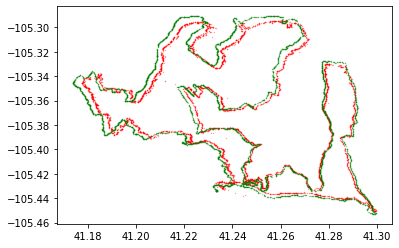

In [77]:
# Plotting actual points with GPS points

predicted_df = pd.DataFrame(data=res_df[0:,0:],index=[i for i in range(res_df.shape[0])],columns=['f'+str(i) for i in range(res_df.shape[1])])

actual_df = pd.DataFrame(data=y_test_actual[0:,0:],index=[i for i in range(y_test_actual.shape[0])],columns=['f'+str(i) for i in range(y_test_actual.shape[1])])

# for i in range(len(res_df)):
# #   print(i)
plt.scatter(x=predicted_df['f0'],y=predicted_df['f1'],c='r',s=0.1,alpha=0.5)
plt.scatter(x=actual_df['f0'],y=actual_df['f1'],c='g',s=0.1,alpha=0.5)

plt.show()

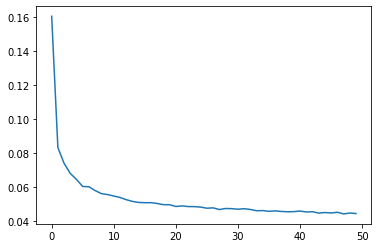

In [75]:
plt.plot(history.history['loss'])
plt.show()

In [ ]:
# import pyproj

# # Example position data, should be somewhere in Germany
# x = 784413.4586438217
# y = 5735894.791428658
# z = -2667746.972596679


# # ecef = pyproj.Proj(proj='geocent', ellps='WGS84', datum='WGS84')
# # lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
# # lon, lat, alt = pyproj.transform(ecef, lla, x, y, z, radians=True)

# # print(lat, lon, alt)

# lon, lat, alt = pyproj.transform(ecef, lla, x, y, z, radians=False)

# print(lat, lon, alt)

# lon, lat, alt = -24.887220848803036, 82.2128095673836, 0

# x,y,z = pyproj.transform(lla,ecef,lat,lon,alt)
# print(x,y,z)

In [ ]:
# import pyproj

# def convert_to_ecef(lat,lon,alt=0):
#     return pyproj.transform(lla,ecef,lat,lon,alt)

# def convert_to_lla(x,y,z):
#     return pyproj.transform(ecef, lla, x, y, z, radians=False)

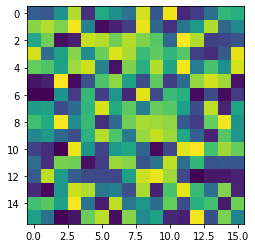

In [92]:
import matplotlib.pyplot as plt

data = np.random.random(size=(16, 16))

plt.imshow(data)


In [152]:
from PIL import Image, ImageDraw
img = Image.new('RGB', (20, 20), color = (255, 255, 255))
d = ImageDraw.Draw(img)
d.text((5,5), "O", fill=(0,0,0))
img.save('pil_text.png')

# plt.imshow(d)

In [216]:
x=plt.imread('pil_text.png', format=None)
# plt.imshow(x)

# print(x)
# x.reshape(x.shape[0],x.shape[0],1)
print(x.shape)
lum_img = x[:,:,0]
# plt.imshow(x)
print(lum_img.shape)
# plt.imshow(lum_img)
# lum_img = lum_img.reshape(20,20)
print(lum_img)
# plt.imshow(lum_img,cmap='gray')

# xx = np.append(xx,values=[lum_img,lum_img],axis=1)
xx= np.append(lum_img,lum_img,axis=0)
yy= np.append(lum_img,lum_img,axis=0)

zz = np.append(xx,yy,axis=1)
print(zz.shape)

# np.concatenate((arr,[[lumimg,lum_img , lum_img]] ) , axis=0)
# plt.imshow(zz)


(20, 20, 3)
(20, 20)
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

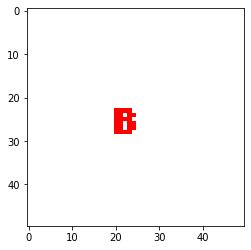

In [150]:
y=plt.imread('pil_text1.png', format=None)
plt.imshow(y)

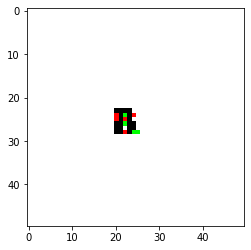

In [140]:
z= np.multiply(x,y)
plt.imshow(z)